In [610]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [812]:
def get_iris_data():
    iris = load_iris()
    iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
    return iris_df

In [813]:
iris_df = get_iris_data()

In [814]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Analys of datasets

In [815]:
n_of_datapoints= len(iris_df)
print("Number of datapoints in the iris datasets are: ", n_of_datapoints)

Number of datapoints in the iris datasets are:  150


Text(0, 0.5, 'Antal')

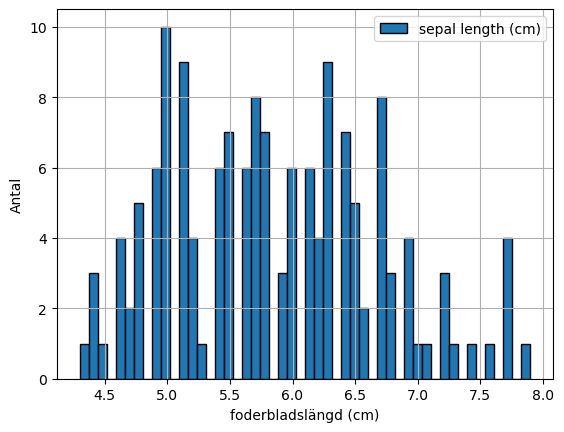

In [816]:
iris_df['sepal length (cm)'].hist(legend=True, bins = 50, ec = 'black')
plt.xlabel('foderbladslängd (cm)')
plt.ylabel('Antal')

Text(0, 0.5, 'Antal')

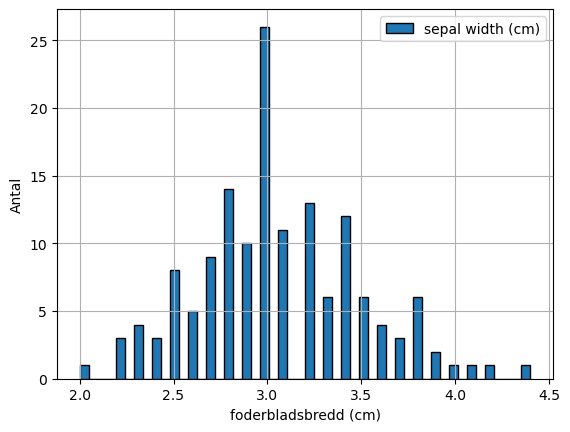

In [817]:
iris_df['sepal width (cm)'].hist(legend = True, bins = 50, ec = 'black')
plt.xlabel('foderbladsbredd (cm)')
plt.ylabel('Antal')

Text(0, 0.5, 'Antal')

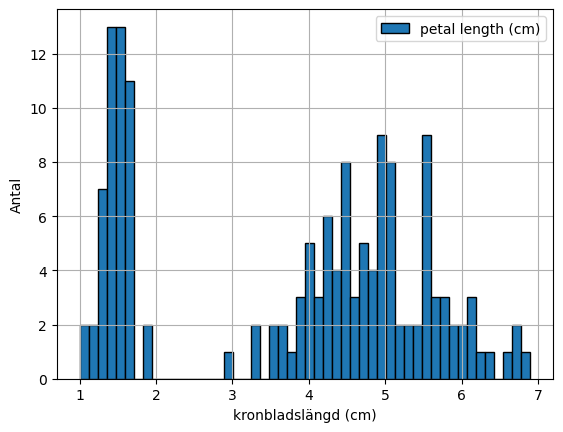

In [818]:
iris_df['petal length (cm)'].hist(legend = True, ec ='black', bins = 50)
plt.xlabel('kronbladslängd (cm)')
plt.ylabel('Antal')

Text(0, 0.5, 'Antal')

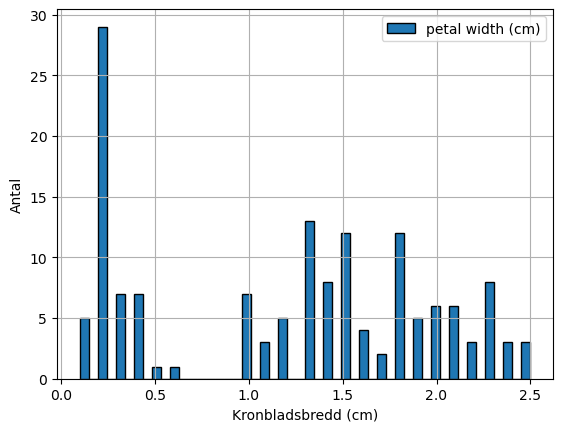

In [819]:
iris_df['petal width (cm)'].hist(legend = True, ec = 'black', bins = 50)
plt.xlabel('Kronbladsbredd (cm)')
plt.ylabel('Antal')

### Histogrammen öven visar hur datapunkterna är fördelade över de olika attributen. Man kan se att sepal length och sepal width har ungefär normalfördelning medan petal length och petal width är mer snedfördelade.

# KMeans algoritm:
### K-means-algoritmen identifierar ett visst antal centroider inom en datamängd, en centroid är det aritmetiska medelvärdet av alla datapunkter som tillhör en särskild kluster. Algoritmen tilldelar sedan varje datapunkt till det närmaste klustret när den försöker hålla klustren så små som möjligt (K-means 'medelvärden' hänvisar till uppgiften att ta medelvärdet av data eller hitta centroiden). Samtidigt försöker K-means att hålla de andra klustren så olika som möjligt.

## sepal length och sepal width

Text(0, 0.5, 'sepal width')

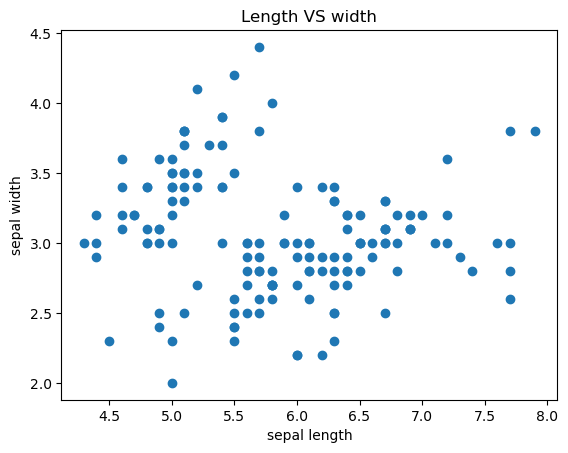

In [820]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
plt.title ("Length VS width")
plt.xlabel('sepal length')
plt.ylabel('sepal width')

## klustrering utifrån sepal length och sepal width:

In [829]:
kmeans = KMeans(n_clusters = 3, max_iter = 100)

In [830]:
cluster_df1 =iris_df[['sepal length (cm)', 'sepal width (cm)']]# ska använda två atributer sepal length och sepal bredden 

In [831]:
kmeans.fit(cluster_df1)

/Users/yari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3)

In [832]:
kmeans.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [833]:
kmeans.predict(cluster_df1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [834]:
cluster_df1['Sepal Cluster'] = kmeans.predict(cluster_df1)# vi lägger till det ny colum i vår dataframe

/var/folders/dx/g8pn_s113csglsn8llvrhjjr0000gn/T/ipykernel_39228/1224853723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df1['Sepal Cluster'] = kmeans.predict(cluster_df1)# vi lägger till det ny colum i vår dataframe


In [835]:
cluster_df1.head()

,sepal length (cm),sepal width (cm),Sepal Cluster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2


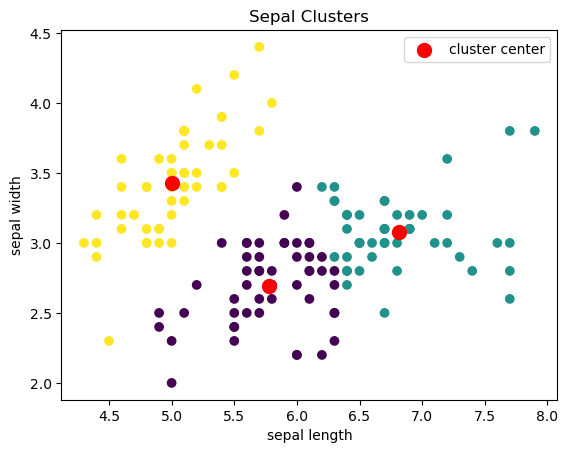

In [836]:
plt.scatter(cluster_df1['sepal length (cm)'], cluster_df1['sepal width (cm)'], c= cluster_df1['Sepal Cluster'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'red', label = 'cluster center')
plt.title('Sepal Clusters')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

## klustrering utifrån sepal length och petal length:

In [838]:
kmeans = KMeans(n_clusters = 4, max_iter = 100)

In [839]:
cluster_df2 =iris_df[['sepal length (cm)', 'petal length (cm)']]# ska använda två atributer sepal length och sepal bredden 

In [840]:
kmeans.fit(cluster_df2)

/Users/yari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=4)

In [841]:
kmeans.cluster_centers_

array([[7.12272727, 6.03181818],
       [5.006     , 1.462     ],
       [6.292     , 4.94      ],
       [5.53214286, 3.96071429]])

In [842]:
cluster_df2['sepal-petal-cluster'] = kmeans.predict(cluster_df2)# vi lägger till det ny colum i vår dataframe

/var/folders/dx/g8pn_s113csglsn8llvrhjjr0000gn/T/ipykernel_39228/53285942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df2['sepal-petal-cluster'] = kmeans.predict(cluster_df2)# vi lägger till det ny colum i vår dataframe


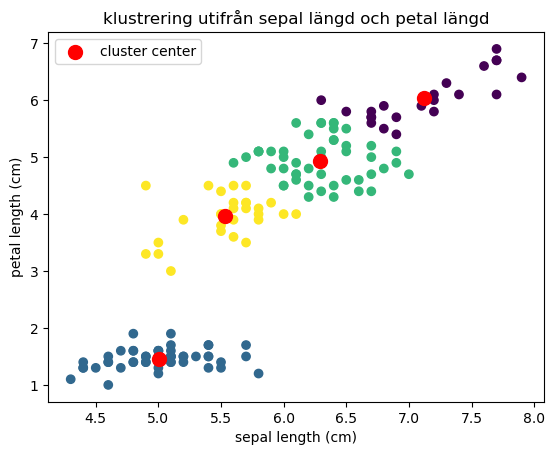

In [845]:
plt.scatter(cluster_df2['sepal length (cm)'], cluster_df2['petal length (cm)'], c= cluster_df2['sepal-petal-cluster'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'red', label = 'cluster center')
plt.title('klustrering utifrån sepal längd och petal längd')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()

## klustrering utifrån sepal width och petal width:

In [846]:
kmeans = KMeans(n_clusters = 4, max_iter = 100)

In [847]:
cluster_df3 =iris_df[['sepal width (cm)', 'petal width (cm)']]

In [848]:
kmeans.fit(cluster_df3)

/Users/yari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=4)

In [849]:
kmeans.cluster_centers_

array([[2.912     , 1.582     ],
       [3.45102041, 0.24489796],
       [3.12857143, 2.225     ],
       [2.44782609, 1.15217391]])

In [850]:
kmeans.predict(cluster_df3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0,
       0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 2, 3, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 3, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [851]:
cluster_df3['sep-width-pet-width Cluster'] = kmeans.predict(cluster_df3)# vi lägger till det ny colum i vår dataframe

/var/folders/dx/g8pn_s113csglsn8llvrhjjr0000gn/T/ipykernel_39228/4059091150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df3['sep-width-pet-width Cluster'] = kmeans.predict(cluster_df3)# vi lägger till det ny colum i vår dataframe


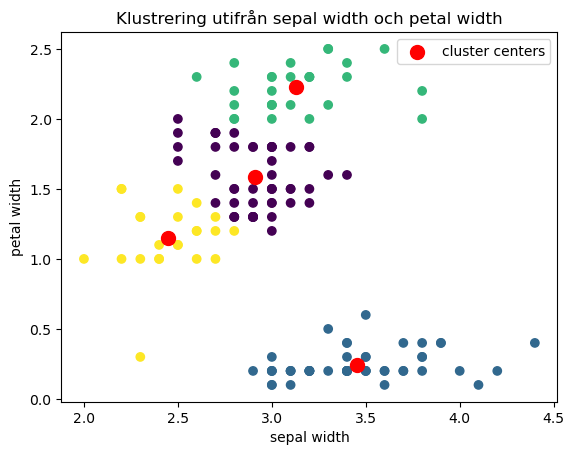

In [852]:
plt.scatter(cluster_df3['sepal width (cm)'], cluster_df3['petal width (cm)'], c= cluster_df3['sep-width-pet-width Cluster'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'red', label ='cluster centers')
plt.title('Klustrering utifrån sepal width och petal width')
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()
plt.show()

### I analyset ovan har jag använt 4 kluster, eftersom syftet med klusteranalyset är att se om det går att dela upp blommorna i olika typer utifrån deras sepal längd och sepal bredd. Här kan man tollka klustren som grupper av blommor som har liknande sepal längd och sepal bredd. Eftersom det ser mer utspridda ut vilken betyder att atributen skiljer sig mellan dem grupper, så för ett lämpligt gruppering utifrån deras sepal längd och bredd, 4 kluster låter mer lämpligt tycker jag.

## petal length vs petal width

Text(0, 0.5, 'pepal width')

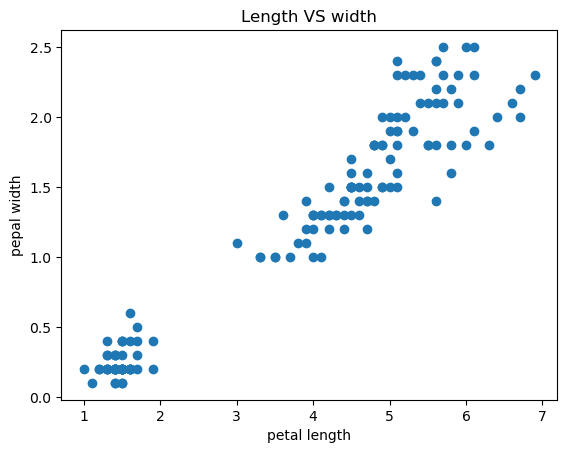

In [853]:
plt.scatter(iris_data['petal length (cm)'], iris_data['petal width (cm)'])
plt.title ("Length VS width")
plt.xlabel('petal length')
plt.ylabel('pepal width')

## klustrering utifrån petal length och petal width:

In [854]:
kmeans = KMeans(n_clusters = 3, max_iter = 100)

In [855]:
cluster_df4= iris_df[['petal length (cm)', 'petal width (cm)']]

In [856]:
kmeans.fit(cluster_df4)

/Users/yari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3)

In [857]:
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [858]:
cluster_df4['petal cluster'] = kmeans.predict(cluster_df4)# vi lägger till det ny colum i vår dataframe

/var/folders/dx/g8pn_s113csglsn8llvrhjjr0000gn/T/ipykernel_39228/1063355751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df4['petal cluster'] = kmeans.predict(cluster_df4)# vi lägger till det ny colum i vår dataframe


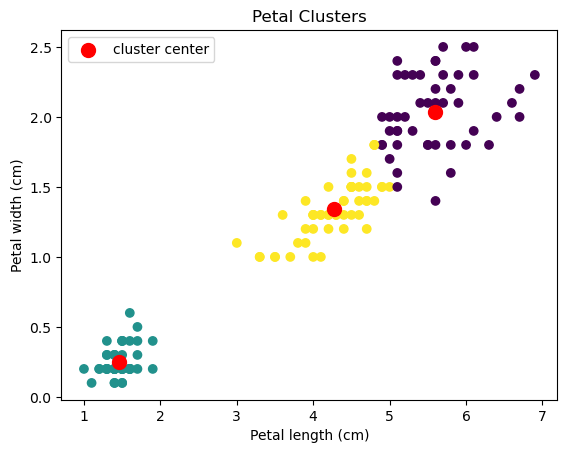

In [859]:
plt.scatter(cluster_df4['petal length (cm)'], cluster_df4['petal width (cm)'], c= cluster_df4['petal cluster'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'red', label ='cluster center')
plt.title('Petal Clusters')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.show()

### Här ovan, i analyset av blommor utifrån deras petal längd och petal bredd tre kluster låter mer lämpligt för datan är ganska samlad i tre positioner. 

## Slutligen, att använda bara två attribut har jag analyserat i fyra steg med olika attribut, "klustrering utifrån sepal length och sepal width, klustrering utifrån sepal length och petal length, klustrering utifrån sepal width och petal width, klustrering utifrån petal length och petal width".
## I svar till frågan om, vilka attribut är bäst att använda när två attribut får användas?  Jag tycker att klustrering uttifrån attributen (petal length och petal width) är bäst att använda. för att datan är mer kompakta och separerade i det här, därför  kan man få ut mer unika grupper av blommor.
## Men om man vill få ut mer detaljerade grupper så är det bäst att använda attributen (sepal length och petal length) med fyra kluster

# del 1
## Att använda alla attributen:

In [860]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Träna med 3 kluster

In [861]:
kmeans1 = KMeans(n_clusters = 3, max_iter = 100)

In [862]:
cluster_df5 = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [863]:
pca = PCA(n_components = 2)

In [864]:
transformed_data = pca.fit_transform(cluster_df5)

In [865]:
kmeans1.fit(transformed_data)

/Users/yari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3)

In [866]:
kmeans1.cluster_centers_

array([[ 0.66567601, -0.3316042 ],
       [-2.64241546,  0.19088505],
       [ 2.34652659,  0.27393856]])

In [867]:
cluster_labels = kmeans1.predict(transformed_data)

In [868]:
transformed_data = np.column_stack((transformed_data, cluster_labels))

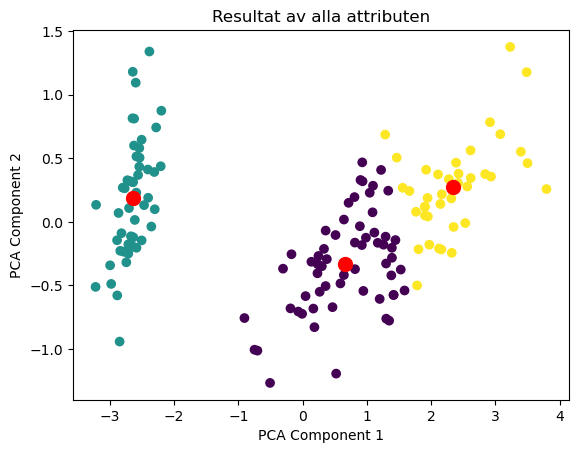

In [869]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=transformed_data[:, 2])
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 100, c = 'red', label = 'cluster centers')
plt.title('Resultat av alla attributen')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## för att se om det blir någon skilnad så här nedan har jag skalat med MinMaxScaler() metoden i en olika range.
## Det visar fortfarande att tre kluster är mer rimligt även vid användning av alla fyra attributen, för att man kan se datapunkterna är uppdelade i tre distinkta kluster, var och en representerad av en annan färg. Klustercentrumen är markerade i rött, och man kan se att de är välplacerade i mitten av varje kluster. Detta tyder på att klusteringsalgoritmen var framgångsrik i att identifiera de naturliga grupperingarna i datan.


In [870]:
kmeans1 = KMeans(n_clusters = 3, max_iter = 100)

In [871]:
cluster_df5 = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [872]:
pca = PCA(n_components = 2)

In [873]:
transformed_data = pca.fit_transform(cluster_df5)

In [874]:
scaler = MinMaxScaler(feature_range=(0, 5))

In [875]:
scaled_data = scaler.fit_transform(transformed_data)

In [876]:
kmeans1.fit(scaled_data)

/Users/yari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3)

In [877]:
kmeans1.cluster_centers_

array([[2.75501762, 1.5528551 ],
       [0.41412671, 2.759055  ],
       [3.78145181, 2.96549515]])

In [878]:
cluster_labels = kmeans1.predict(scaled_data)

In [879]:
scaled_data = np.column_stack((scaled_data, cluster_labels))

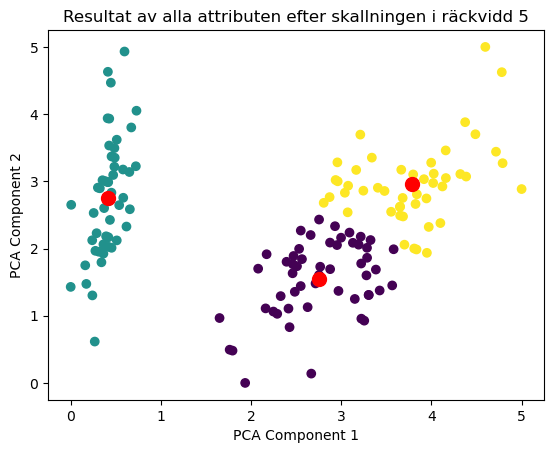

In [880]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=scaled_data[:, 2])
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 100, c = 'red', label = 'cluster centers')
plt.title('Resultat av alla attributen efter skallningen i räckvidd 5')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

#

# del 2

## Antalet tatapunkter:

### Det finns  1500000 tatapunkter och  8 attribut i datasetet.

In [881]:
datasets = pd.read_csv('/Users/yari/2023/ML/special_iris.csv')

In [882]:
n, m = datasets.shape

In [883]:
print('Det finns ', n, 'tatapunkter och ', m, 'attribut i datasetet.')

Det finns  1500000 tatapunkter och  8 attribut i datasetet.


In [885]:
cluster_df6 = datasets[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'extra sepal length', 'extra sepal width', 'extra petal length', 'extra petal width']]

In [886]:
pca = PCA(n_components = 2)

In [887]:
transformed_data = pca.fit_transform(cluster_df6)

In [888]:
kmeans = KMeans(n_clusters = 3, max_iter = 100)

In [889]:
kmeans.fit(transformed_data)

/Users/yari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3)

In [890]:
cluster_label = kmeans1.predict(transformed_data)

In [891]:
transformed_data = np.column_stack((transformed_data, cluster_label))# här lägger jag till en ny kolumn i dataframmen

In [893]:
kmeans.cluster_centers_

array([[ 4.70566682, -0.61054961],
       [-3.28208813, -0.29924157],
       [ 0.56184805,  0.66479647]])

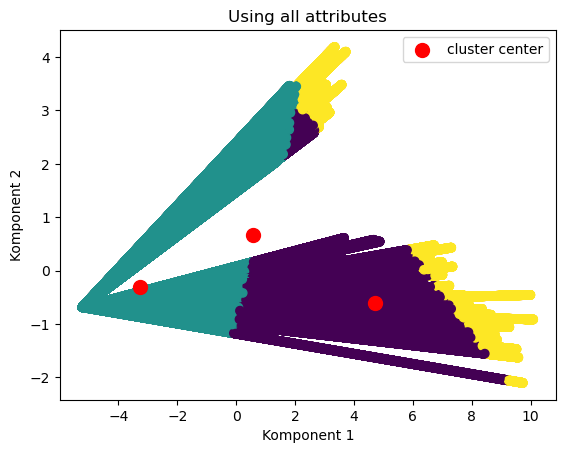

In [894]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=transformed_data[:, 2])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'red', label ='cluster center')
plt.title('Using all attributes')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.legend()
plt.show()

### Man ser att klustercentret är inte väl plaserad så jag vill skala den med MinMaxScale metoden för att se om det blir bättre.

In [895]:
pca = PCA(n_components = 2)

In [896]:
transformed_data = pca.fit_transform(cluster_df6)

In [897]:
kmeans = KMeans(n_clusters = 3, max_iter = 200)

In [898]:
scaler = MinMaxScaler(feature_range=(0, 10))

In [899]:
scaled_data = scaler.fit_transform(transformed_data)

In [900]:
kmeans.fit(scaled_data)

/Users/yari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=200, n_clusters=3)

In [901]:
kmeans.cluster_centers_

array([[1.61373148, 2.73965405],
       [3.63165443, 6.56465209],
       [5.75741571, 2.4262299 ]])

In [902]:
cluster_label = kmeans1.predict(scaled_data)

In [903]:
scaled_data = np.column_stack((scaled_data, cluster_label))

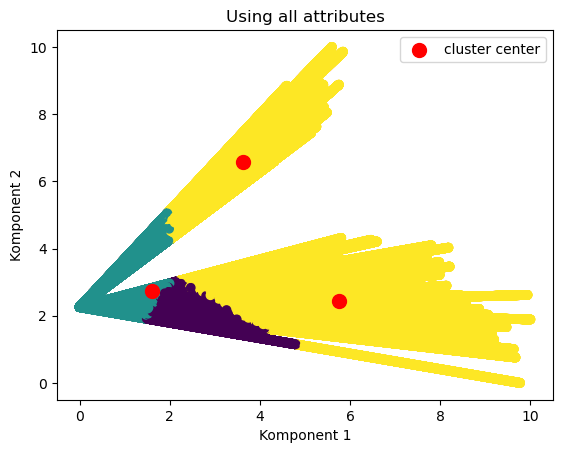

In [904]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=scaled_data[:, 2])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'red', label ='cluster center')
plt.title('Using all attributes')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.legend()
plt.show()

### Jag har försökt skala i olika i olika range, och testade med olika mängd iterationer och olika antal kluster men fick inte något bra resultat.
## I svar till frågan Hur skiljer sig tiden för algoritmen att bli klar jämfört med när klustringen av vanliga iris-datasetet sker? 
###  Eftersom special-iris-datasetet har 1500000 datapunkter och 8 attribut, tar det längre tid att köra k-means algoritmen jämfört med iris-datasetet som har 150 datapunkter och bara 4 attribut.
## Vad är det som gör att tiden skiljer sig?
### Tiden skiljer sig främst på grund av antalet datapunkter. Ju fler datapunkter man har, desto längre tid tar det för k-means algoritmen att konvergera till en lösning. Dessutom kan antalet kluster man vill ha också påverka tiden det tar för algoritmen att bli klar. Det är också möjligt att special-iris-datasetet är mer komplicerat eller svårare att klustra än iris-datasetet, vilket kan öka tiden det tar för algoritmen att bli klar.
